# dev birth death rates
Tim Tyree<br>
10.2.2020

In [66]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

# #load the libraries
from lib import *

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load a file of data.  Get n_tips versus time for one time series
- (optionally) kill_all_odd_rows
- check for old bdrates routine
- (re)make a routine mapping one log to one bdrates.csv. store in lib.routines
- daskbag a folder with ^this routine.  make this functional

In [81]:
# def birth_death_rates_from_log(input_file_name, data_dir_bdrates, 
#                                col_n = 'n', col_t = 't', 
#                                kill_all_odd_rows = True, 
#                                min_time = 1000, printing = True):
#     df = pd.read_csv(input_file_name)

#     if kill_all_odd_rows:
#         df.drop(df[df[col_n]%2==1].index, inplace=True)
#         assert(~(df[col_n]%2==1).values.any())
#     boo = df[col_t]>=min_time
#     df = df[boo]

#     n_series = df[col_n]
#     t_series = df[col_t]

#     any_tips_observed = (n_series > 0).any()

#     #if there were not any tips observed, don't make a .csv in bdrates and return False
#     if not any_tips_observed:
#         if printing:
#             print('no birth-death event was detected!')
#         return False
#     else:
#         #store as a pandas.DataFrame
#         df = compute_bdrates(n_series,t_series)
#         df.to_csv(data_dir_bdrates, index=False)
#         return True

In [110]:
def compute_bdrates(n_series,t_series):
    df = pd.DataFrame({"t":t_series.values,"n":n_series.values})
    #compute birth death rates
    df['dn'] = df.n.diff().shift(-1)
    df = df.query('dn != 0').copy()
    rates = 1/df['t'].diff().shift(-1).dropna() # birth death rates in unites of 1/ms
    df['rates'] = rates
    # df.dropna(inplace=True) #this gets rid of the termination time datum.  we want that!
    df.index.rename('index', inplace=True)
    return df

In [114]:
input_file_name = search_for_file()

File: /Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_birth_deaths_V_0.6_ic_200x200.120.32_t_0_2e+03.csv


In [115]:
# #V_0.4
# input_file_name = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_birth_deaths_V_0.4_ic_200x200.120.32_t_0_2e+03.csv"
# data_dir_bdrates = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_bdrates_V_0.4_ic_200x200.120.32_t_0_2e+03.csv"


#V_0.6
input_file_name = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_birth_deaths_V_0.6_ic_200x200.120.32_t_0_2e+03.csv"
data_dir_bdrates = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_bdrates_V_0.4_ic_200x200.120.32_t_0_2e+03.csv"






In [116]:
df = pd.read_csv(input_file_name)

In [117]:
df.drop(df[df.n%2==1].index, inplace=True)

In [118]:

# input_file_name = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_birth_deaths_ic_200x200.120.32_t_0_6e+03.csv"
# data_dir_bdrates = "/Users/timothytyree/Documents/GitHub/care/notebooks/Figures/methods/example_bdrates_ic_200x200.120.32_t_0_6e+03.csv"

retval = birth_death_rates_from_log(input_file_name, data_dir_bdrates)

In [119]:
n_series = df['n']
t_series = df['t']

In [120]:
df = compute_bdrates(n_series,t_series)

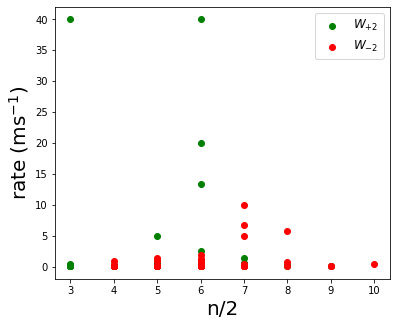

In [121]:
log_scale = False
fontsize=20
figsize=(6,5)
fig, ax = plt.subplots(figsize=figsize)

x_values = df.query('dn==2').n/2
y_values = df.query('dn==2').rates
ax.scatter(x=x_values,y=y_values, c='g', label='$W_{+2}$')

x_values = df.query('dn==-2').n/2
y_values = df.query('dn==-2').rates
ax.scatter(x=x_values,y=y_values, c='r', label='$W_{-2}$')

ax.legend(fontsize=fontsize-8)
ax.set_xlabel('n/2', fontsize=fontsize)
ax.set_ylabel('rate (ms$^{-1}$)', fontsize=fontsize)
plt.show()

*Question for WJ*: Roughly how much time between two of your observations?

# TODO: investigate these high freq birth deaths
1. identify the first time after 500 where a birth over 35/ms occurs
1. goto dev curve intersection and plot it
1. put it all in a openoffice draw file for group meeting! Quick!


In [90]:
df[df.rates>35].t

index
81023     3025.600
81431     3035.800
83259     3081.500
194454    5861.375
Name: t, dtype: float64

In [92]:
t_target = 3025.600

In [101]:
df[df.t>=t_target-0.025].head(10)

,t,n,dn,rates
index,,,,
81023,3025.600,14,2.0,40.000000
81024,3025.625,16,2.0,20.000000
81026,3025.675,18,2.0,13.333333
81029,3025.750,20,-4.0,13.333333
81032,3025.825,16,2.0,20.000000
81034,3025.875,18,-2.0,0.100756
81431,3035.800,16,2.0,40.000000
81432,3035.825,18,-2.0,5.000000
81440,3036.025,16,-2.0,0.384615
